<a href="https://colab.research.google.com/github/arjunverma2004/Krish-Naik-Data-Science-course-code/blob/main/Practice%20Code/S42_43_45_46_chatgpt_prac_ques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Hierarchical Clustering – Customer Segmentation


In [ ]:
!pip install kagglehub[pandas-datasets]

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Mall_Customers.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "vjchoudhary7/customer-segmentation-tutorial-in-python",file_path

  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-2-06fe64b33487>:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.DataFrame(df)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

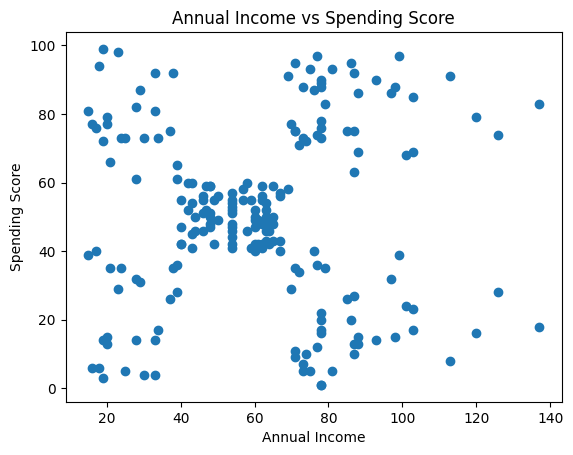

In [ ]:
plt.scatter(df.Annual_Income,df.Spending_Score)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df[['Annual_Income','Spending_Score']])

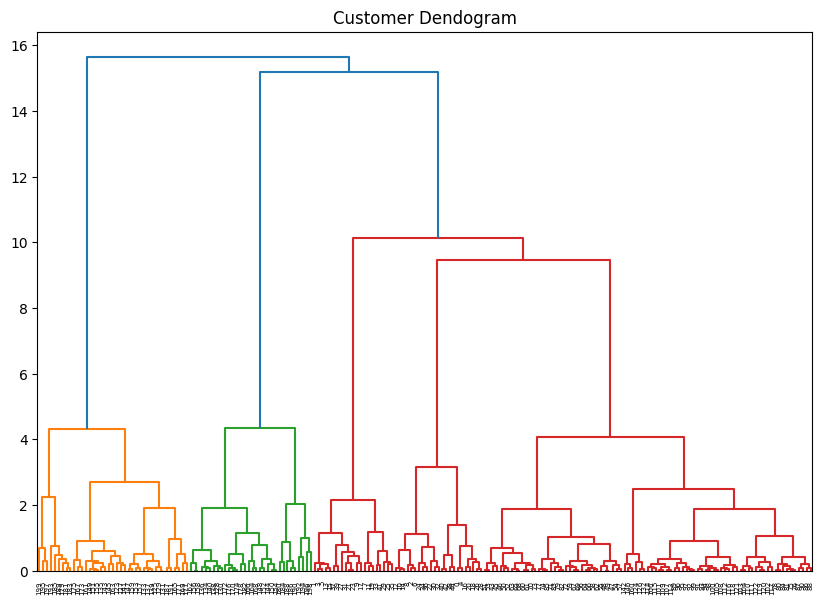

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Customer Dendogram')
dend=shc.dendrogram(shc.linkage(df_scaled,method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
cluster.fit_predict(df_scaled)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

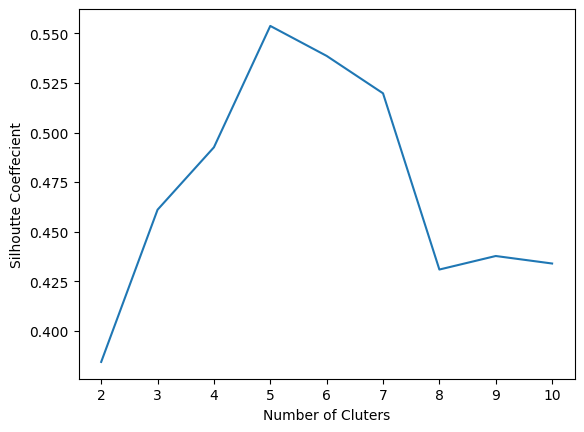

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    cluster1=AgglomerativeClustering(n_clusters=k,metric='euclidean',linkage='ward')
    cluster1.fit(df_scaled)
    score=silhouette_score(df_scaled,cluster1.labels_)
    silhouette_coefficients.append(score)
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

In [ ]:
!pip install kneed

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

In [ ]:
from kneed import KneeLocator
knee_locator=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
knee_locator.elbow

np.int64(5)

In [ ]:
df_pred=cluster.fit_predict(df_scaled)

Text(0, 0.5, 'Spending Score')

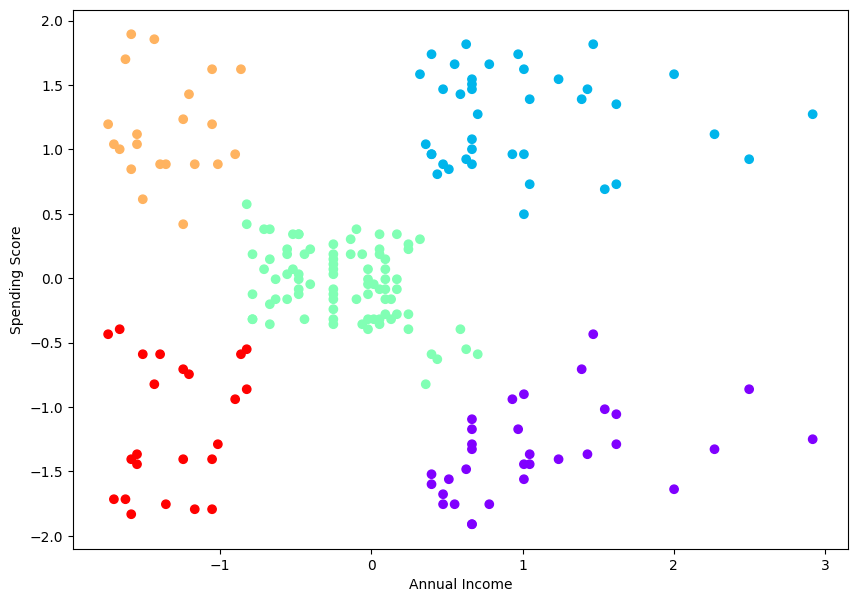

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(df_scaled[:,0],df_scaled[:,1],c=df_pred,cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [ ]:
from sklearn.ensemble import IsolationForest
iso=IsolationForest(contamination=0.1)
pred=iso.fit_predict(df_scaled)

In [ ]:
import numpy as np
index = np.where(pred < 0)
index

(array([  0,   2,   6,   7,   8,  11,  19,  22,  30,  32,  41, 185, 192,
        193, 194, 195, 196, 197, 198, 199]),)

In [ ]:
x=df.values

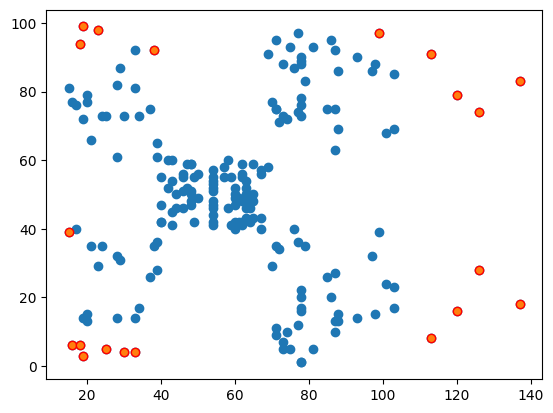

In [ ]:
index = np.where(pred < 0)
plt.scatter(df.iloc[:,3], df.iloc[:,4])
plt.scatter(x[index,3], x[index,4], edgecolors="r")

##2. DBSCAN – Clustering Noisy Data


In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=300, noise=0.1)

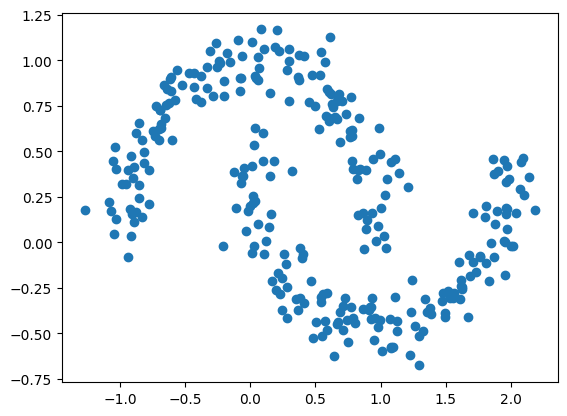

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.09,min_samples=2)
dbscan.fit(X)

DBSCAN(eps=0.09, min_samples=2)

In [ ]:
y_pred=dbscan.fit_predict(X)

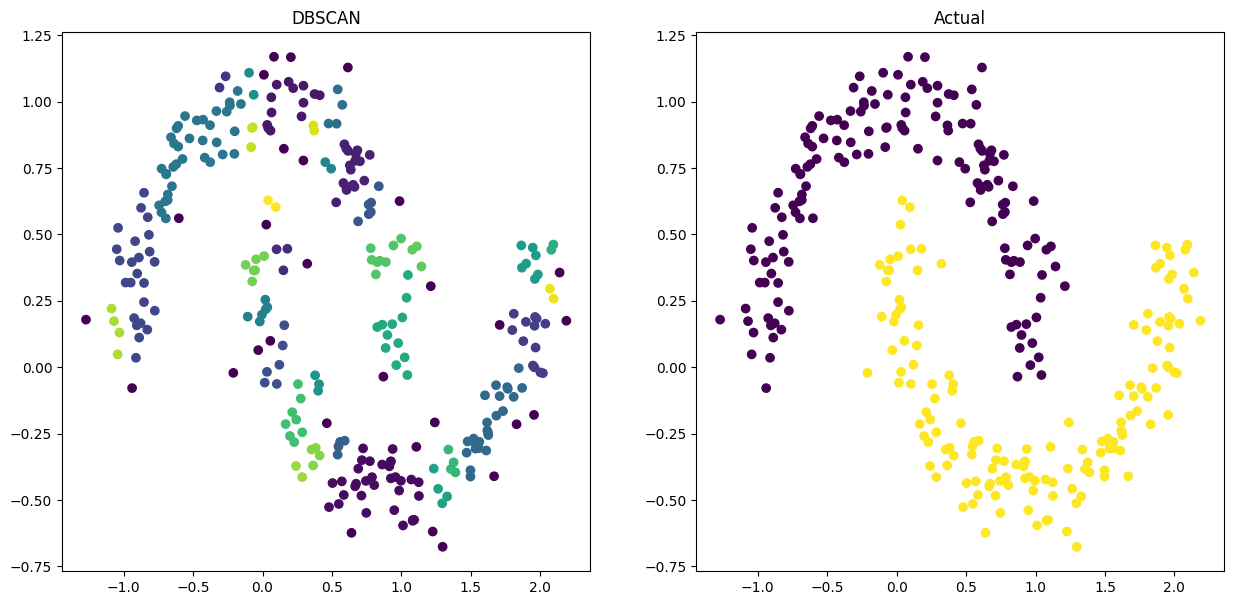

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.title("DBSCAN")
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("Actual")
plt.show()

In [ ]:
dbscan.labels_

array([ 0,  1, -1,  2,  0,  3,  4,  5,  6,  7,  8,  9,  0, 10, -1, 10, -1,
       11, -1, 12,  1,  5, 13,  2, -1, 12,  3,  1, 13, 12,  5, 14,  6, 10,
        2, 15, 12, 12,  0,  3, 16,  0,  6,  6, 10, 17, 18,  1, 18, 19, 12,
        2,  6,  5, 19,  1, 12,  8, 20, -1,  6,  0,  0, -1,  0,  6,  6, 10,
       12,  1,  6, 21, 22, 10, 12,  5,  6, 16, 23, 12, 15, 12,  1,  2,  2,
       12,  8, -1, 10, 23, 17, 21, 24, -1, 25, 22, 17, 23, -1, 10, 23, 12,
       13,  8, 26, 27,  9,  8,  1,  6,  0, 11, 10,  0, -1, 26,  5, 27, 19,
       12,  2, 13, 10, 10,  5, 28, 19,  5,  7, 12, 19,  8, 21, 13,  0, 29,
       12,  0, -1,  5, -1,  0, 22, 10, -1,  0, -1,  0,  0, 26, 10,  9, 28,
        0, 14, 30, 25, 24, 22,  2,  1,  6, 13, 12,  5, -1, 19,  0, 22, 23,
       -1, 11, 24,  1, 12,  0, 12, 23,  0,  6, 29,  2,  9, -1, 23, -1, 12,
        0, 12, 10,  6, 20, -1, 31, 32, 29, 12, 31,  0, 16, 19,  6,  7,  6,
       -1,  6, 22, 12, 11, 12, 12,  0, 12, -1, 17, 12, -1,  0, 12,  6,  7,
        6, 10, 25, 10, 19

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [ ]:
cdf=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [ ]:
cdf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
scaler1=StandardScaler()
cdf_scaled=scaler1.fit_transform(cdf)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
cdf_sc_pca=pca.fit_transform(cdf_scaled)

In [ ]:
cdf_sc_pca_df = pd.DataFrame(cdf_sc_pca)
cdf_sc_pca_df.head()

,0,1
0,0.418406,0.707299
1,-0.392155,0.577863
2,1.870339,0.698912
3,0.316741,0.485520
4,-0.003562,0.407770


In [ ]:
from sklearn.ensemble import IsolationForest
iso=IsolationForest(contamination=0.0017)
pred=iso.fit_predict(cdf_sc_pca_df)

In [ ]:
import numpy as np
index = np.where(pred < 0)
x=cdf_sc_pca_df.values

(array([     0,      2,     20, ..., 284795, 284802, 284806]),)

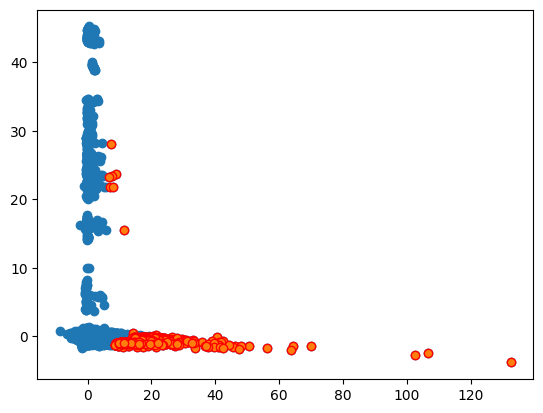

In [ ]:
index = np.where(pred < 0)
plt.scatter(cdf_sc_pca_df.iloc[:,0], cdf_sc_pca_df.iloc[:,1])
plt.scatter(x[index,0], x[index,1], edgecolors="r")

In [ ]:
pred_df=pd.DataFrame(pred)
pred_df[0].replace({1:'0',-1:'1'},inplace=True)

In [ ]:
pred_df[0].astype(int)

,0
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [ ]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       284807 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
pred_df[0] = pred_df[0].astype(int)
print(confusion_matrix(cdf['Class'],pred_df[0]))
print(accuracy_score(cdf['Class'],pred_df[0]))

[[283849    466]
 [   485      7]]
0.9966608966773991


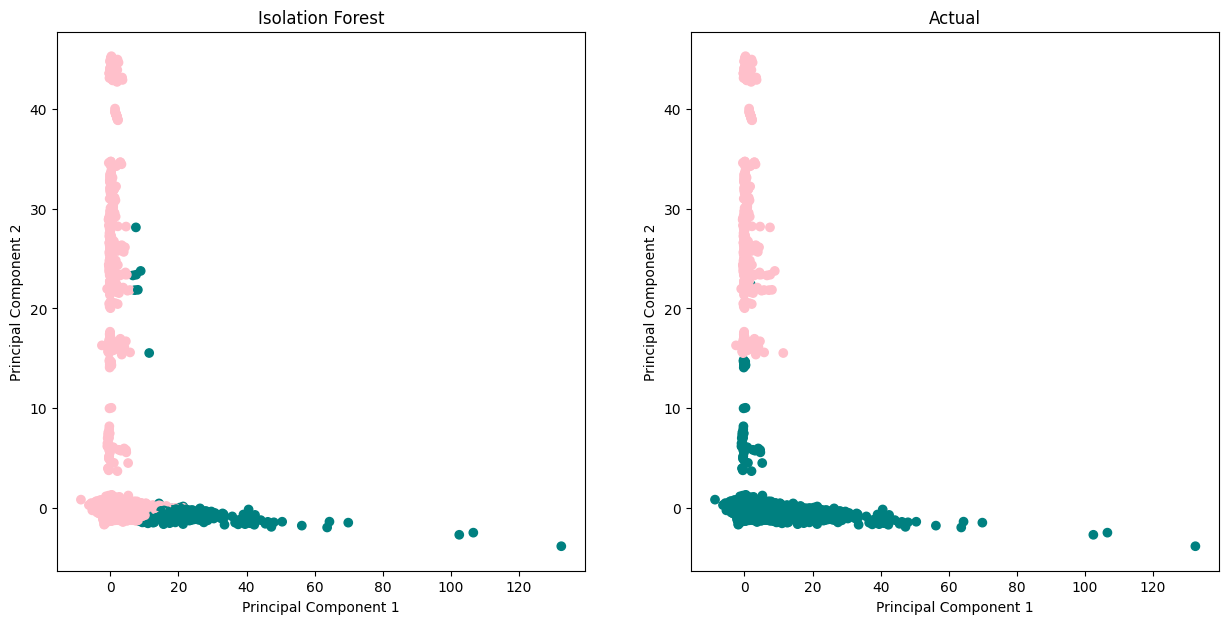

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.colors

# Define a colormap: blue for label 0, red for label 1
# The list of colors corresponds to the labels [0, 1]
colors = ['pink', 'teal']
cmap = matplotlib.colors.ListedColormap(colors)

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
# Use pred_df[0] to ensure it's a Series
plt.scatter(cdf_sc_pca_df.iloc[:,0], cdf_sc_pca_df.iloc[:,1], c=pred_df[0], cmap=cmap)
plt.title("Isolation Forest")
plt.xlabel('Principal Component 1') # Add axis labels for clarity
plt.ylabel('Principal Component 2')

colors1 = ['teal','pink']
cmap1 = matplotlib.colors.ListedColormap(colors1)
plt.subplot(1,2,2)
plt.scatter(cdf_sc_pca_df.iloc[:,0], cdf_sc_pca_df.iloc[:,1], c=cdf['Class'], cmap=cmap1)
plt.title("Actual")
plt.xlabel('Principal Component 1') # Add axis labels for clarity
plt.ylabel('Principal Component 2')

plt.show()

In [ ]:
comdf=pd.concat([pred_df,cdf['Class']],axis=1)

,0,Class
284787,0,0
284788,0,0
284789,0,0
284790,0,0
284791,0,0
284792,0,0
284793,0,0
284794,0,0
284795,0,0
284796,0,0
